<a href="https://colab.research.google.com/github/SvitlanaPastukh/SvitlanaPastukh/blob/master/SvitlanaPastukh_class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


clas_pred  clas_test  clas_train
/content/drive/My Drive/image_classification/clas_train/clas_train
forest
buildings
mountain
glacier
street
sea
Shape of Images: (60, 150, 150, 3)
Shape of Labels: (60,)


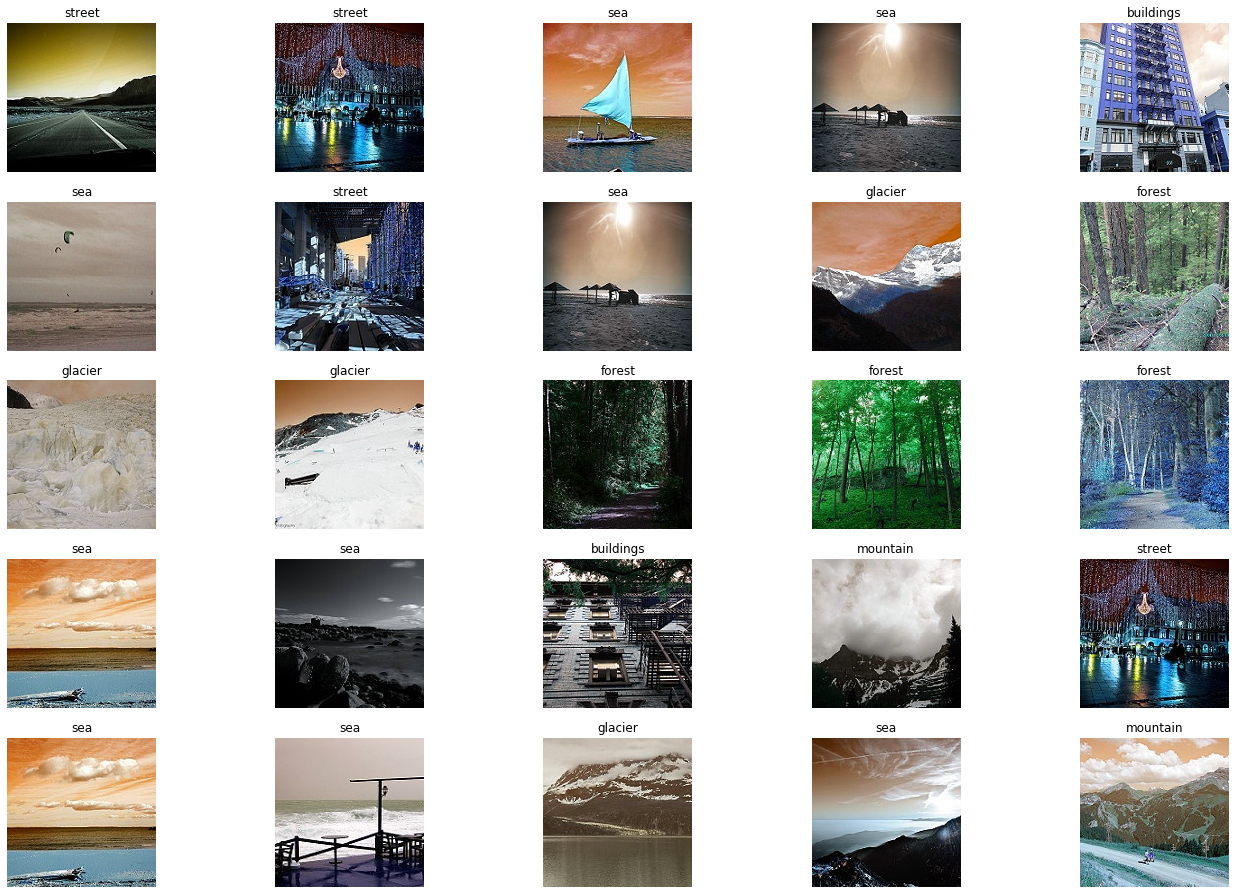

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.utils import shuffle
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import numpy as np
import os
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix as CM
from google.colab import drive
drive.mount
#('/content/drive')
!ls drive/My\ Drive/image_classification
!cd drive/My\ Drive/image_classification/clas_train/clas_train; pwd


def get_classlabel(class_code):
               labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
               return labels[class_code]


def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        print(labels)
        if labels == 'glacier': 
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        i=0
        for image_file in os.listdir(directory+labels): 
            image = cv2.imread(directory+labels+r'/'+image_file) 
            image = cv2.resize(image,(150,150)) 
            Images.append(image)
            Labels.append(label)
            i=i+1
            if i==500:
              print (image_file)
              i=0
           
            if i==10:
              break
    
    return shuffle(Images,Labels,random_state=817328462) 


Images, Labels = get_images('drive/My Drive/image_classification/clas_train/clas_train/')
Images = np.array(Images) 
Labels = np.array(Labels)


print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('drive/My Drive/image_classification/clas_train/clas_train/',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [0]:
test_set = test_datagen.flow_from_directory('drive/My Drive/image_classification/clas_train/clas_train/', 
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [0]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [0]:
trained = classifier.fit(training_set,
                         steps_per_epoch = 140//32,
                         epochs = 15,
                         validation_data = test_set,
                         validation_steps = 150//32)

Epoch 1/15
4/4 [==============================] - 73s 18s/step - loss: 2.2233 - acc: 0.1953 - val_loss: 1.7627 - val_acc: 0.2188
Epoch 2/15
4/4 [==============================] - 117s 29s/step - loss: 1.7197 - acc: 0.2734 - val_loss: 1.6182 - val_acc: 0.2891
Epoch 3/15
4/4 [==============================] - 98s 25s/step - loss: 1.5968 - acc: 0.3438 - val_loss: 1.4824 - val_acc: 0.4062
Epoch 4/15
4/4 [==============================] - 91s 23s/step - loss: 1.3836 - acc: 0.4688 - val_loss: 1.4548 - val_acc: 0.3750
Epoch 5/15
4/4 [==============================] - 130s 32s/step - loss: 1.4396 - acc: 0.4453 - val_loss: 1.2589 - val_acc: 0.4922
Epoch 6/15
4/4 [==============================] - 100s 25s/step - loss: 1.3039 - acc: 0.5703 - val_loss: 1.2871 - val_acc: 0.4453
Epoch 7/15
4/4 [==============================] - 98s 25s/step - loss: 1.3069 - acc: 0.5000 - val_loss: 1.3505 - val_acc: 0.4375
Epoch 8/15
4/4 [==============================] - 109s 27s/step - loss: 1.4153 - acc: 0.4453 -

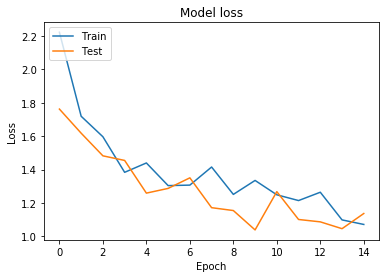

In [0]:
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

KeyError: ignored

In [18]:
pred_images, no_labels = get_images('drive/My Drive/image_classification/clas_pred/')
pred_images = np.array(pred_images)
pred_images.shape


8664.jpg


NotADirectoryError: ignored

In [0]:
          fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(classifier.predict_classes(pred_image)[0])
    pred_prob = classifier.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()